# Pranav Bhagat

# Data Cleaning

In [1]:
#Import Libraries
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
def cleanData(person_df, household_df, post2018 = True):
    person_df = person_df
    household_df = household_df
    pFeatures = ["SERIALNO", "SPORDER", "PUMA", "PWGTP", "AGEP", "CIT", "COW", "ENG", "FER", "JWMNP"
               , "MAR", "MIL", "SCH", "SCHL", "SEX", "PAP", "INTP", "SSIP", "SSP", "WAGP"
               , "OIP", "RETP", "SEMP", "PERNP", "PINCP", "WKL", "DIS", "ESR", "HICOV", "HISP"
               , "PAOC", "POVPIP", "RAC1P", "RACASN", "RACBLK", "RACWHT", "RACSOR", "SCIENGP", "WKHP"
               , "SOCP"]
    if post2018:
        pFeatures = pFeatures + ["RELSHIPP", "JWTRNS", "WKWN"]
    else:
        pFeatures = pFeatures + ["RELP", "JWTR", "WKW"]
    hFeatures = ["SERIALNO", "PUMA", "NP", "ACCESS", "ACR", "BATH", "FS", "ELEP", "FULP", "GASP", "HISPEED"
              , "LAPTOP", "RNTP", "RWATPR", "TEN", "VALP", "VEH", "WATP", "HINCP", "HUPAC", "KIT", "PLM"
              , "GRPIP", "RMSP"]
    person_df = person_df.loc[:, pFeatures].copy()
    household_df = household_df.loc[:, hFeatures].copy()
    person_df = person_df.loc[(person_df["PUMA"] > 101) & (person_df["PUMA"] <= 105)].copy()
    household_df = household_df.loc[(household_df["PUMA"] > 101) & (household_df["PUMA"] <= 105)].copy()
    person_df.loc[(person_df.RAC1P == 1) & (person_df.HISP == 1), "RACE"] = "White"
    person_df.loc[(person_df.RAC1P == 2) & (person_df.HISP == 1), "RACE"] = "African American"
    person_df.loc[(person_df.RAC1P == 6) & (person_df.HISP == 1), "RACE"] = "Asian"
    person_df.loc[(person_df.RAC1P.isin([3, 4, 5, 7, 8, 9])) & (person_df.HISP == 1), "RACE"] = "Other"
    person_df.loc[person_df.HISP != 1, "RACE"] = "Latino"
    person_df = person_df.merge(household_df, how = 'left', on = 'SERIALNO').copy()
    person_df = person_df.reindex(person_df.index.repeat(person_df.PWGTP)).reset_index(drop=True).drop(['PWGTP', 'PUMA_y'], axis=1).rename(columns={"PUMA_x": "PUMA"}).copy()
    return person_df

In [3]:
def getSize(df, showDim = False, name = ""):
    if name != "":
        name = name + " "
    if showDim:
        print("Dimensions for the " + name + "dataset: " + str(df.shape))
    print("New DataFrame size: " + str(int(df.memory_usage(index=True).sum()/1000000)) + " MB")

In [4]:
pca191 = pd.read_csv("2019pCA1.csv")
hca191 = pd.read_csv("2019hCA1.csv")
pca191_Ok = cleanData(pca191, hca191)

#pca181 = pd.read_csv("./Data/2018pCA1.csv")
#hca181 = pd.read_csv("./Data/2018hCA1.csv")

## Indicator Calculation

In [5]:
def Main(x):
    global PBF
    PBF = x

Main(pca191_Ok)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

### Health Insurance

In [7]:
def HealthIns():
    d1 = pd.crosstab(PBF['RACE'],PBF['HICOV'])
    d1.columns = ['Yes','No']
    sums = d1.select_dtypes(pd.np.number).sum().rename('Total')
    d2 = d1.append(sums)
    d3 = d2[['Yes','No']]
    cols = ['Yes', 'No']
    d3[cols] = round(d3[cols].div(d3[cols].sum(axis=1), axis=0).multiply(100),3)
    scoreh1 = d3.iloc[4,1]/d3.iloc[0,1]
    sh1 = 1/scoreh1
    scoreh2 = d3.iloc[4,1]/d3.iloc[2,1]
    sh2 = 1/scoreh2
    Indhi = round(d2['Yes']/d2['No'],3)
    index = ['African American','Asian','Latino','Other','White']
    d4 = pd.DataFrame({'Have Insurance': d3.Yes,'Do not have Insurance': d3.No}, index=index)
    plt.bar(d3.index, d3.No)
    for i, v in enumerate(d3.No):
        plt.text(x=i, y=v+1, s=f"{v}", color='blue', fontweight='bold', ha='center')
    plt.show()
    return Indhi, sh2, d4;

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


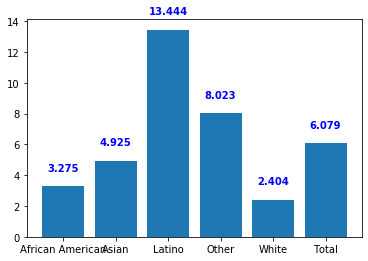

In [8]:
I1 = HealthIns()

In [9]:
I1[1]

5.59234608985025

### Kitchen Facilities

In [10]:
def KitchenFac():
    k1 = pd.crosstab(PBF['RACE'], PBF['KIT'])
    k1.columns = ['Yes','No']
    sums = k1.select_dtypes(pd.np.number).sum().rename('Total')
    k2 = k1.append(sums)
    k2 = k2[['Yes','No']]
    cols = ['Yes', 'No']
    k2[cols] = k2[cols].div(k2[cols].sum(axis=1), axis=0).multiply(100)
    k2 = k2[['Yes','No']]
    scorek1 = k2.iloc[4,1]/k2.iloc[0,1]
    sk1 = 1/scorek1
    Ind47 = k2['Yes']/k2['No']
    fig = plt.figure(figsize = (10, 5))
    plt.bar(k1.index, k1.Yes, color ='blue',width = 0.4)
    plt.xlabel("Race")
    plt.ylabel("Number of Households")
    plt.title("Households who have proper kitchen facilities")
    for index,data in enumerate(k1.Yes):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20), ha='center')
    plt.show()
    return Ind47, scorek1, fig;

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


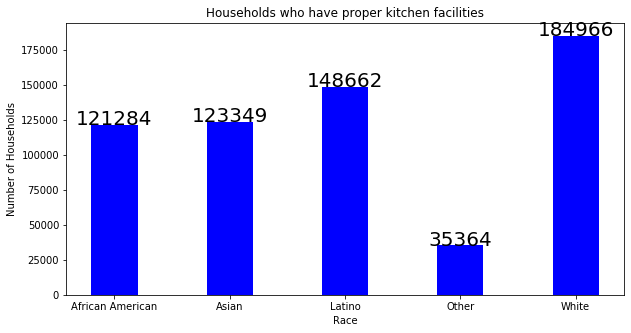

In [11]:
I2 = KitchenFac()

In [12]:
I2[1]

1.7170270739578697

### Living Wage

In [13]:
def LivingWage():
    w1 = PBF[['RACE','WAGP']]
    w2 = w1.dropna()
    conditions = [
        (w2['WAGP'] < 20000),
        (w2['WAGP'] > 20000) & (w2['WAGP'] < 79000),
        (w2['WAGP'] > 79000)]
    choices = ['0', '1', '2']
    w2['WageCat'] = np.select(conditions, choices)
    w6 = pd.crosstab(w2['RACE'],w2['WageCat'])
    w6.columns = ['Less','Moderate','High']
    sums = w6.select_dtypes(pd.np.number).sum().rename('Total')
    w6 = w6.append(sums)
    w6 = w6[['Less','Moderate','High']]
    cols = ['Less', 'Moderate', 'High']
    w6[cols] = w6[cols].div(w6[cols].sum(axis=1), axis=0).multiply(100)
    scorew2 = w6.iloc[4,2]/w6.iloc[2,2]
    Ind11 = w6['Less']/w6['High']
    w7 = pd.DataFrame({'Less than 20 000': w6.Less, '20 000 to 79 000': w6.Moderate, 'Above 79 000': w6.High})
    fig = plt.figure(figsize = (15,15))
    w7.plot(kind='bar', stacked=True)
 
    
   
    return Ind11, w6, scorew2, fig;

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


<Figure size 1080x1080 with 0 Axes>

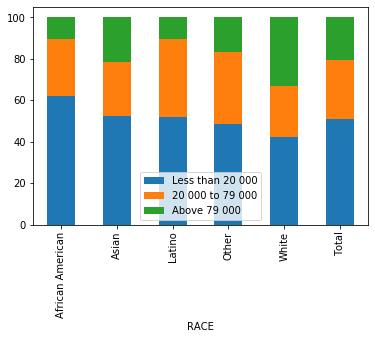

In [14]:
I3 = LivingWage()

In [15]:
I3[0]

RACE
African American    5.933209
Asian               2.426370
Latino              5.010740
Other               2.879544
White               1.274874
Total               2.487404
dtype: float64

### Attrition from Field Training

In [16]:
dataf = [['African American', 17, 8], ['Asian', 18, 11], ['Latino', 46, 16], ['Other', 10, 1], ['White', 27, 3],['Total',118,39]]

In [17]:
FTO1 = pd.DataFrame(dataf, columns = ['Race','Completed','DNC'])

In [18]:
FTO1.set_index('Race', inplace=True)

In [19]:
FTO1

,Completed,DNC
Race,,
African American,17,8
Asian,18,11
Latino,46,16
Other,10,1
White,27,3
Total,118,39


In [20]:
FTO1 = FTO1[['Completed','DNC']]
cols = ['Completed', 'DNC']
FTO1[cols] = round(FTO1[cols].div(FTO1[cols].sum(axis=1), axis=0).multiply(100),3)

In [21]:
FTO1

,Completed,DNC
Race,,
African American,68.000,32.000
Asian,62.069,37.931
Latino,74.194,25.806
Other,90.909,9.091
White,90.000,10.000
Total,75.159,24.841


In [22]:
Ind57 = FTO1['DNC'].squeeze()

### Attrition from Academy

In [23]:
dataA = [['African American', 30, 24],['Asian', 42, 16], ['Latino', 77, 38], ['Other', 3, 1], ['White', 49, 20],['Total',201,99]]

In [24]:
Aca1 = pd.DataFrame(dataA, columns = ['Race','Completed','DNC'])

In [25]:
Aca1.set_index('Race', inplace=True)

In [26]:
Aca1

,Completed,DNC
Race,,
African American,30,24
Asian,42,16
Latino,77,38
Other,3,1
White,49,20
Total,201,99


In [27]:
Aca1 = Aca1[['Completed','DNC']]
cols = ['Completed', 'DNC']
Aca1[cols] = round(Aca1[cols].div(Aca1[cols].sum(axis=1), axis=0).multiply(100),3)

In [28]:
Aca1

,Completed,DNC
Race,,
African American,55.556,44.444
Asian,72.414,27.586
Latino,66.957,33.043
Other,75.000,25.000
White,71.014,28.986
Total,67.000,33.000


In [29]:
Ind56 = Aca1['DNC'].squeeze()

In [30]:
IndSum = pd.concat([I1[0], I2[0], I3[0], Ind56, Ind57], axis=1)
IndSum.columns = ['Indicator 27','Indicator 11','Indicator 47','Indicator 56','Indicator 57']
IndSum

,Indicator 27,Indicator 11,Indicator 47,Indicator 56,Indicator 57
African American,29.534,213.152900,5.933209,44.444,32.000
Asian,19.305,131.924064,2.426370,27.586,37.931
Latino,6.438,85.882149,5.010740,33.043,25.806
Other,11.464,167.601896,2.879544,25.000,9.091
White,40.591,123.723077,1.274874,28.986,10.000
Total,15.450,124.190447,2.487404,33.000,24.841


### PS : Data not available for Indicators - 

#### 40 - Homelessness, 

#### 65 - Voter Turnout, 

#### 66 - Equal access

## ML - Random Forest

In [31]:
PBF1 = PBF[['RACE','WAGP','HICOV','KIT','SOCP','PLM','ESR','FS']]

In [32]:
PBF1['RACE'].replace({'African American':0, 'Asian':1, 'Latino':2, 'Other':3, 'White':4},inplace=True)

C:\Users\Pranav\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
PBF2 = PBF1.dropna()

In [34]:
from sklearn.model_selection import train_test_split

X=PBF2[['FS', 'HICOV', 'RACE','PLM','KIT']]  # Features
y=PBF2['ESR']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [35]:
X_train.shape, y_train.shape

((234532, 5), (234532,))

In [36]:
X_test.shape, y_test.shape

((156356, 5), (156356,))

In [37]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [38]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.842276599554862


In [39]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[131358      0      0      0    122]
 [  2519      0      0      0      0]
 [  6022      0    180      0      0]
 [   465      0      0      0      0]
 [ 15533      0      0      0    157]]


C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.84      1.00      0.91    131480
         2.0       0.00      0.00      0.00      2519
         3.0       1.00      0.03      0.06      6202
         4.0       0.00      0.00      0.00       465
         6.0       0.56      0.01      0.02     15690

    accuracy                           0.84    156356
   macro avg       0.48      0.21      0.20    156356
weighted avg       0.80      0.84      0.77    156356

0.842276599554862


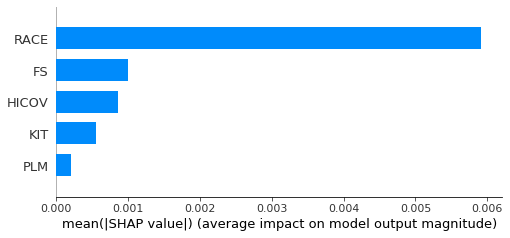

In [41]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

## Stats - Chi Square

In [42]:
P19 = pca191_Ok

In [43]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

### SNAP

In [44]:
def SNAP():
    fs1 = P19[['RACE','FS']]
    fs2 = pd.crosstab(fs1['RACE'],fs1['FS'])
    z1 = fs2.iloc[['0','4']]
    stat1, p1, dof1, expected1 = chi2_contingency(fs2)
    print('dof=%d' % dof1)
    print(expected1)

    prob = 0.95
    critical1 = chi2.ppf(prob, dof1)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical1, stat1))
    if abs(stat1) >= critical1:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p1))
    if p1 <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return stat1,p1,dof1,expected1;

In [45]:
CSq1 = SNAP()

dof=4
[[ 12331.61647645 111329.38352355]
 [ 12529.46322756 113115.53677244]
 [ 15096.88381936 136294.11618064]
 [  3595.74503609  32462.25496391]
 [ 18813.29144055 169845.70855945]]
probability=0.950, critical=9.488, stat=19856.473
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Health Insurance

In [46]:
def HealthInsCS():
    h1 = P19[['RACE','HICOV']]
    h2 = pd.crosstab(h1['RACE'],h1['HICOV'])
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2


    stat2, p2, dof2, expected2 = chi2_contingency(h2)
    print('dof=%d' % dof2)
    print(expected2)
    prob = 0.95
    critical2 = chi2.ppf(prob, dof2)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical2, stat2))
    if abs(stat2) >= critical2:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p2))
    if p2 <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return stat2,critical2,p2,dof2,expected2;

In [47]:
CSq2 = HealthInsCS() 

dof=4
[[116143.43368393   7517.56631607]
 [118006.82288852   7638.17711148]
 [142187.67896785   9203.32103215]
 [ 33865.97174352   2192.02825648]
 [177190.09271618  11468.90728382]]
probability=0.950, critical=9.488, stat=21078.944
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Financial Assistance

In [48]:
def FinAssist():
    f1 = P19[['RACE','PAP']]
    f2 = pd.crosstab(f1['RACE'],f1['PAP'])
    col_list= list(f2)
    col_list.remove(0)
    f2['1'] = f2[col_list].sum(axis=1)
    f3 = f2.iloc[:, list(range(1)) + [-1]]
    stat3, p3, dof3, expected3 = chi2_contingency(f3)
    print('dof=%d' % dof3)
    print(expected3)
    # interpret test-statistic
    prob = 0.95
    critical3 = chi2.ppf(prob, dof3)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical3, stat3))
    if abs(stat3) >= critical3:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p3))
    if p3 <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return stat3,p3,dof3,expected3;

In [49]:
CSq3 = FinAssist()

dof=4
[[100412.99396108   2079.00603892]
 [112687.84859694   2333.15140306]
 [112246.97665296   2324.02334704]
 [ 24556.56727973    508.43272027]
 [162591.61350928   3366.38649072]]
probability=0.950, critical=9.488, stat=5713.176
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Overcrowding

In [50]:
def OverCrowd():
    pca191_Ok=P19
    pca191_Ok['P_room'] = pca191_Ok['NP']/pca191_Ok['RMSP'] # person per room is no. of persons /no. of rooms
    pca191_Ok[pca191_Ok.P_room>1.5].tail(20)
    pca191_Ok.loc[(pca191_Ok['P_room'] >= 0.01) & (pca191_Ok['P_room']<= 1.50),'P_room'] = 0
    pca191_Ok.loc[(pca191_Ok['P_room']> 1.51),'P_room'] = 1
    pca191_Ok.loc[pca191_Ok['P_room'].isnull(),'P_room'] = -1
    pca191_Ok_ = pca191_Ok[(pca191_Ok.RACE == "White") | (pca191_Ok.RACE == "African American") | (pca191_Ok.RACE == "Asian") | (pca191_Ok.RACE == "Other") | (pca191_Ok.RACE == "Latino")] # filtering by race
    pca191_Ok_ = pca191_Ok_[pca191_Ok_.P_room != -1]
    oc1 = pca191_Ok_[['RACE','P_room']]
    oc2 = pd.crosstab(oc1['RACE'],oc1['P_room'])
    stat4, p4, dof4, expected4 = chi2_contingency(oc2)
    print('dof=%d' % dof4)
    print(expected4)
    # interpret test-statistic
    prob = 0.95
    critical4 = chi2.ppf(prob, dof4)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical4, stat4))
    if abs(stat4) >= critical4:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p4))
    if p4 <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return stat4,p4,dof4,expected4;

In [51]:
CSq4 = OverCrowd()

dof=4
[[114860.54634429   6992.45365571]
 [117152.04502026   7131.95497974]
 [141762.79735711   8630.20264289]
 [ 33533.55219977   2041.44780023]
 [175761.05907858  10699.94092142]]
probability=0.950, critical=9.488, stat=35610.375
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Home Ownership

In [52]:
def HomeOwn():
    home_df = pca191_Ok.loc[((pca191_Ok['RELSHIPP']==20) & (pca191_Ok['TEN'].notna())),["RACE","TEN"]]
    home_df = pca191_Ok.loc[((pca191_Ok['RELSHIPP']==20) & (pca191_Ok['TEN'].notna())),["RACE","TEN"]]
    home_df = pca191_Ok.loc[((pca191_Ok['RELSHIPP']==20) & (pca191_Ok['TEN'].notna())),["RACE","RELSHIPP","TEN"]]
    home_df['Owned'] = np.where(home_df['TEN'].isin([1,2]), 'yes', 'no')
    tab1 = pd.crosstab(home_df[home_df.RACE.isin(['Latino','Asian'])].RACE,home_df[home_df.RACE.isin(['Latino','Asian'])].Owned)
    ho3 = pd.crosstab(home_df['RACE'],home_df['Owned'])
    stat5, p5, dof5, expected5 = chi2_contingency(ho3)
    print('dof=%d' % dof5)
    print(expected5)
    # interpret test-statistic
    prob = 0.95
    critical5 = chi2.ppf(prob, dof5)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical5, stat5))
    if abs(stat5) >= critical5:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p5))
    if p5 <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return stat5,p5,dof5,expected5;

In [53]:
CSq5 = HomeOwn()

dof=4
[[28224.37421481 22027.62578519]
 [26403.48308203 20606.51691797]
 [23863.67132928 18624.32867072]
 [ 6862.88363708  5356.11636292]
 [50644.5877368  39525.4122632 ]]
probability=0.950, critical=9.488, stat=10420.844
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Chi Square result

In [54]:
statr = [CSq1[0],CSq2[0],CSq3[0],CSq4[0],CSq5[0]]
pvalr = [CSq1[1],CSq2[2],CSq3[1],CSq4[1],CSq5[1]]
critr = [CSq2[1],CSq2[1],CSq2[1],CSq2[1],CSq2[1]]
dofr = [CSq1[2],CSq2[3],CSq3[2],CSq4[2],CSq5[2]]
expall = [CSq1[3],CSq2[3],CSq3[3],CSq4[3],CSq5[3]]
ind = ['SNAP','Financaial Assistance','Health Insurance','Overcrowding','Home Ownership']
res = ['Dependent','Dependent','Dependent','Dependent','Dependent']

In [55]:
CS = pd.DataFrame({'Indicator':ind,'DegreeOfFreedom':dofr,'ChiSq Stat':statr,'Pvalue':pvalr,'CriticalVal':critr,'Result':res})

In [56]:
CS.set_index('Indicator', inplace=True)

In [57]:
CS

,DegreeOfFreedom,ChiSq Stat,Pvalue,CriticalVal,Result
Indicator,,,,,
SNAP,4,19856.473152,0.0,9.487729,Dependent
Financaial Assistance,4,21078.944037,0.0,9.487729,Dependent
Health Insurance,4,5713.176179,0.0,9.487729,Dependent
Overcrowding,4,35610.375190,0.0,9.487729,Dependent
Home Ownership,4,10420.843897,0.0,9.487729,Dependent
